# Car price prodiction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler # veriler kac olursa olsun 1 ile 0 arasinda dogru oranlarla degistirir 
from sklearn.model_selection import train_test_split # test ve train verisini ayirmak icin kullanilir
from tensorflow.keras.models import Sequential # model olusturmak icin 
from tensorflow.keras.layers import Dense # model icine katman atar



In [4]:
dataFrame = pd.read_excel("merc.xlsx")
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
dataFrame.isnull().sum() # bos veri var mi kontrol

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

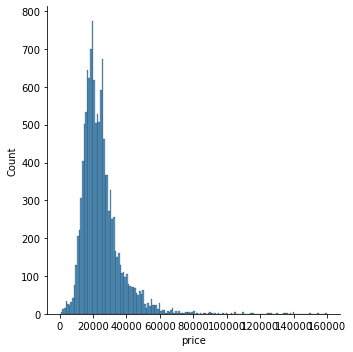

In [15]:
sbn.displot(dataFrame["price"]) # dagilim

In [21]:
dataFrame[dataFrame['price']>100000] # veriyi bozmasin diye veri setinden cikartacagiz

,year,price,transmission,mileage,tax,mpg,engineSize
5,2011,149948,Automatic,3000,570,21.4,6.2
8,2019,139948,Automatic,12000,145,21.4,4.0
1011,2019,104999,Semi-Auto,5822,150,22.6,4.0
1980,2019,109995,Semi-Auto,4688,150,31.7,4.0
2629,2019,123846,Semi-Auto,2951,145,22.1,4.0
2647,2019,125796,Automatic,637,145,24.8,4.0
3978,2019,102502,Semi-Auto,8691,150,11.0,3.0
4087,2019,104590,Automatic,3671,145,31.7,4.0
4094,2019,124366,Semi-Auto,880,145,24.8,4.0
4209,2018,104400,Semi-Auto,3796,145,31.7,4.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

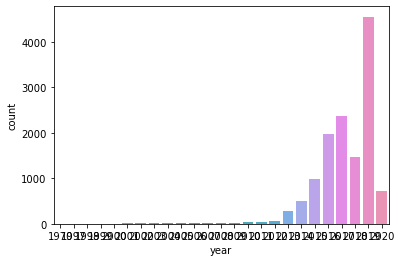

In [24]:
sbn.countplot(dataFrame['year'])

In [25]:
dataFrame.corr() # korelasyon

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [27]:
dataFrame.corr()["price"].sort_values() # korelasyon hesabi
"""
mileage: arabaylar gidilen mesafe ve ne kadar yuksekse o kadar ucuz olur araba 
year: uretim yilidir, ne kadar yeni o kadar pahali
tax: vergisi 'enginSize' ile iliskilidir 
"""

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

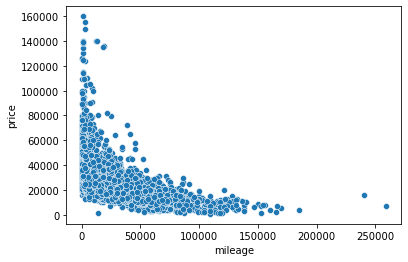

In [29]:
sbn.scatterplot(x='mileage',y='price',data=dataFrame) # mileage arttikca fiyat azaliyor

In [30]:
dataFrame.sort_values('price',ascending=False).head(30)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [31]:
dataFrame.sort_values('price',ascending=True).head(30) # en ucuzdan en yuksege

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [32]:
len(dataFrame) # bir verinin %99nu alirsak genel tablo bozulmadan verileri cekeriz, tablo daha duzgun gozukur

13119

In [33]:
len(dataFrame) * 0.01 # arabalarin en yuksek fiyatlarina sahip 131 arabayi atabiliriz

131.19

In [37]:
yuzdeDoksanDokuzDf = dataFrame.sort_values('price',ascending=False).iloc[131:] # yukaridan baslayarak 131. indexten sonrasini gosterir
yuzdeDoksanDokuzDf

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [38]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

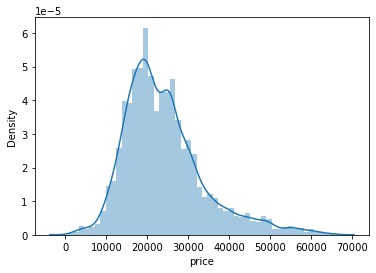

In [39]:
sbn.distplot(yuzdeDoksanDokuzDf['price'])

In [40]:
dataFrame.groupby('year').mean()['price']

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [41]:
yuzdeDoksanDokuzDf.groupby('year').mean()['price'] # 1970 arabasi geneli bozuyor 


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [42]:
dataFrame[dataFrame.year != 1970].groupby('year').mean()['price']

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [43]:
dataFrame = yuzdeDoksanDokuzDf

In [44]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [45]:
dataFrame = dataFrame[dataFrame.year != 1970]

In [46]:
dataFrame.groupby('year').mean()['price']


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [47]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [48]:
dataFrame = dataFrame.drop('transmission',axis=1) # gereksiz column
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [49]:
y = dataFrame['price'].values
x = dataFrame.drop("price",axis=1).values


array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [51]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.3,random_state=10)

In [54]:
len(xTest)

3897

In [55]:
len(xTrain)

9090

In [56]:
scaler = MinMaxScaler()

In [57]:
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [58]:
xTrain.shape

(9090, 5)

In [59]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [60]:
model.fit(x=xTrain,y=yTrain,validation_data=(xTest,yTest),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 5ms/step - loss: 672147072.0000 - val_loss: 688108224.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672132864.0000 - val_loss: 688080576.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672072640.0000 - val_loss: 687958656.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 671830336.0000 - val_loss: 687514240.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 671055296.0000 - val_loss: 686201216.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 668968192.0000 - val_loss: 682929344.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 664181696.0000 - val_loss: 675873664.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 654409088.0000 - val_loss: 662150464.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6363859

In [61]:
lossData = pd.DataFrame(model.history.history)

In [62]:
lossData.head()

,loss,val_loss
0,672147072.0,688108224.0
1,672132864.0,688080576.0
2,672072640.0,687958656.0
3,671830336.0,687514240.0
4,671055296.0,686201216.0


<AxesSubplot:>

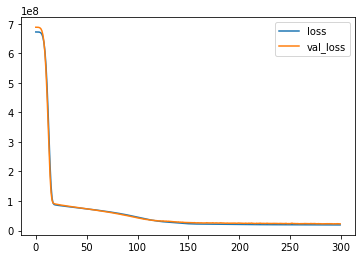

In [65]:
lossData.plot()

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
tahminData = model.predict(xTest)
tahminData

array([[20431.143],
       [22738.459],
       [24822.396],
       ...,
       [25250.852],
       [ 9430.114],
       [24384.791]], dtype=float32)

In [68]:
mean_absolute_error(yTest,tahminData) # price mean'den 3357 liralik sapma gerceklesebilir

3357.791516921445

In [69]:
dataFrame.describe() # mean absolute error / price mean= %13 - %14 sapma ile tahmin

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


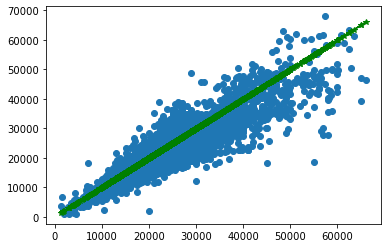

In [71]:
plt.scatter(yTest,tahminData)
plt.plot(yTest,yTest,'g-*')

In [72]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [73]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [75]:
newCarSeries = dataFrame.drop('price',axis=1).iloc[2]
type(newCarSeries)

pandas.core.series.Series

In [76]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1,5))

In [77]:
model.predict(newCarSeries)

array([[61823.953]], dtype=float32)